In [1]:
!pip install tqdm

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 必须先导入这些库，并给它们起对应的“别名”
import sys
import matplotlib as mpl       # 定义 mpl
import matplotlib.pyplot as plt
import numpy as np             # 定义 np
import pandas as pd            # 定义 pd
import sklearn                 # 定义 sklearn
import torch                   # 定义 torch

# --- 以下是你原本的代码 ---

print(sys.version_info)

# 现在这些变量都已经定义过了，循环就可以正常运行了
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

sys.version_info(major=3, minor=14, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.8
numpy 2.4.1
pandas 3.0.0
sklearn 1.8.0
torch 2.10.0+cu130
cuda:0


In [3]:
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

sys.version_info(major=3, minor=14, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.8
numpy 2.4.1
pandas 3.0.0
sklearn 1.8.0
torch 2.10.0+cu130
cuda:0


In [4]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms


# 定义数据集的变换
transform = transforms.Compose([
    transforms.ToTensor(), # 转换为tensor，进行归一化
    # transforms.Normalize(mean, std) # 标准化，mean和std是数据集的均值和方差
])
# fashion_mnist图像分类数据集，衣服分类，60000张训练图片，10000张测试图片
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [5]:
type(train_ds)

torchvision.datasets.mnist.FashionMNIST

In [6]:
len(train_ds)

60000

In [7]:
type(train_ds[0])


tuple

In [8]:
img,label=train_ds[0]
img.shape

torch.Size([1, 28, 28])

In [9]:
print(train_ds[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [10]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [11]:
type(img)

torch.Tensor

In [12]:
# 显示图片，这里需要把transforms.ToTensor(), 进行归一化注释掉，否则是不行的
def show_img_content(img):
    from PIL import Image

    # 打开一个图像文件
    # img = Image.open(img)

    print("图像大小:", img.size)
    print("图像模式:", img.mode)


    # 如果图像是单通道的，比如灰度图，你可以这样获取像素值列表:
    if img.mode == 'L':
        pixel_values = list(img.getdata())
        print(pixel_values)
# show_img_content(img) #这里必须把上面的 transforms.ToTensor(), # 转换为tensor, 进行归一化注

TypeError: Invalid shape (1, 28, 28) for image data

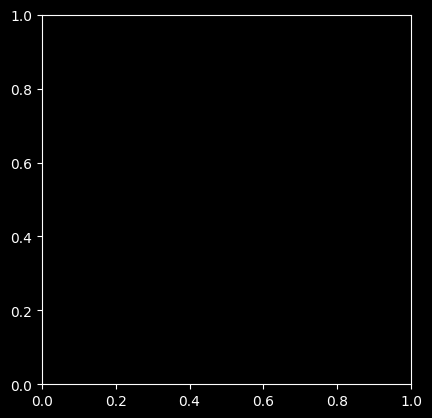

In [13]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.colorbar() # 显示颜色条
    plt.show()

show_single_image(img)

这里如果想画图要把前面的的totensor注释掉

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() # 继承父类的初始化方法，子类有父类的属性
        self.flatten = nn.Flatten() # 展平层
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 300),  # in_features=784, out_features=300, 784是输入特征数, 300是输出特征数
            nn.ReLU(), # 激活函数
            nn.Linear(300, 100), # 隐藏层神经元数100
            nn.ReLU(), # 激活函数
            nn.Linear(100, 10), # 输出层神经元数10
        )

    def forward(self, x): # 前向计算
        # x.shape [batch size, 1, 28, 28]
        x = self.flatten(x)
        # 展平后 x.shape [batch size, 784]
        logits = self.linear_relu_stack(x)
        # logits.shape [batch size, 10]
        return logits # 没有经过softmax，称为logits

model = NeuralNetwork()

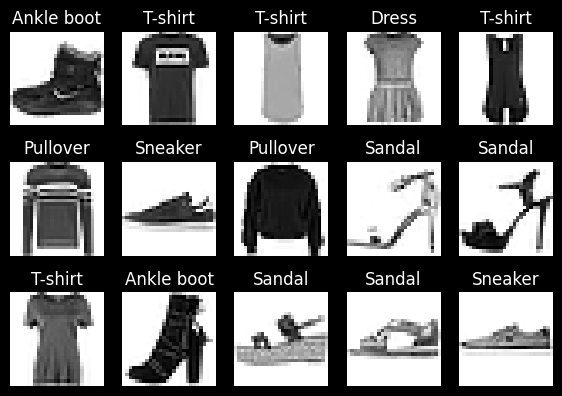

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs(n_rows, n_cols, train_ds, class_names):
    assert n_rows * n_cols < len(train_ds) # 确保打印的图片小于总样本数

    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6)) # 宽1.4高1.6，设置画布大小

    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col # 计算索引，从0开始
            plt.subplot(n_rows, n_cols, index+1) # 因为subplot从1开始计数

            # 获取图像数据和标签
            img_arr, label = train_ds[index]

            # 维度转换：(C, H, W) -> (H, W, C)
            # PyTorch通常是Channel优先，而Matplotlib需要Channel在最后
            img_arr = np.transpose(img_arr, (1, 2, 0)) # 通道换到最后维

            plt.imshow(img_arr, cmap="binary",
                       interpolation = 'nearest') # interpolation='nearest' 是临近插值

            plt.axis('off') # 去除坐标系
            plt.title(class_names[label]) # 显示类别名称

    plt.show()

# 已知的图片类别
# labels在这个路径 https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot'] # 0-9分别代表的类别

# 只是打印了前15个样本 (3行 x 5列)
# 注意：运行此行前，确保 'train_ds' 已经被定义并加载了数据
show_imgs(3, 5, train_ds, class_names)

In [16]:
import torch

# 💡从数据集到dataloader
# train_loader 用于训练模型
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True) # batch_size分批, shuffle洗牌

# val_loader 用于验证/测试模型（通常不需要洗牌）
val_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False)

In [17]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() # 继承父类的初始化方法，子类有父类的属性
        self.flatten = nn.Flatten() # 展平层
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 300), # 输入特征784，输出特征300
            nn.ReLU(),           # 激活函数
            nn.Linear(300, 100), # 隐藏层神经元数100
            nn.ReLU(),           # 激活函数
            nn.Linear(100, 10),  # 输出层神经元数10
        )

    def forward(self, x): # 前向计算
        # x.shape [batch_size, 1, 28, 28]
        x = self.flatten(x)
        # 展平后 x.shape [batch_size, 784]
        logits = self.linear_relu_stack(x)
        # logits.shape [batch_size, 10]
        return logits # 没有经过softmax，称为logits

model = NeuralNetwork()

In [18]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [19]:
# 查看 model网络结构


# 手动计算全连接层参数总量 (Weight + Bias)
# 第一层: 784*300 + 300
# 第二层: 300*100 + 100
# 第三层: 100*10 + 10
784*300+300+300*100+100+100*10+10

266610

只需想想每个节点的逻辑回归就能理解上式

In [20]:
# 重复验证参数量计算
784*300+300+300*100+100+100*10+10

# 遍历模型的所有命名参数，并打印其名称和形状 (Shape)
for name, param in model.named_parameters(): # 打印模型参数
    print(name, param.shape)

linear_relu_stack.0.weight torch.Size([300, 784])
linear_relu_stack.0.bias torch.Size([300])
linear_relu_stack.2.weight torch.Size([100, 300])
linear_relu_stack.2.bias torch.Size([100])
linear_relu_stack.4.weight torch.Size([10, 100])
linear_relu_stack.4.bias torch.Size([10])


In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[-5.0161e-05, -1.6725e-02, -2.0484e-02,  ...,  2.8779e-02,
          -1.5163e-02,  1.8725e-02],
         [ 1.9920e-02,  1.0826e-02, -1.5681e-02,  ..., -3.5376e-02,
           2.6571e-02,  2.8480e-02],
         [ 3.4669e-02, -1.6635e-02,  1.3021e-02,  ..., -2.4095e-02,
           6.7625e-03, -1.2038e-02],
         ...,
         [ 2.1410e-02,  8.6769e-03,  3.0429e-02,  ..., -2.7825e-02,
          -2.2560e-02, -3.5003e-02],
         [-3.4963e-02,  3.1965e-02, -2.3873e-02,  ...,  2.1093e-03,
           3.3417e-03,  1.4292e-02],
         [ 2.5174e-02,  2.7049e-02, -4.3318e-03,  ..., -3.3062e-02,
          -3.4514e-02, -1.5278e-02]], requires_grad=True),
 Parameter containing:
 tensor([-5.2367e-03,  1.5715e-02, -1.8318e-03, -7.9028e-03,  3.2718e-02,
         -2.8203e-03, -7.5243e-03,  6.7494e-03, -9.6213e-04,  3.1639e-02,
          3.3248e-02,  4.8622e-03, -2.6358e-02,  1.7602e-02,  1.3535e-02,
          1.5289e-02, -2.3146e-02, -9.1679e-03,  2.7754e-03,  2.14

In [22]:
from sklearn.metrics import accuracy_score

# 使用装饰器禁止梯度计算，从而节省显存并加快推理速度
@torch.no_grad()
def evaluating(model, dataloader, loss_fct):
    loss_list = []    # 用于存储每个 batch 的损失值
    pred_list = []    # 用于存储模型预测的类别
    label_list = []   # 用于存储真实的标签

    for datas, labels in dataloader:
        # 将数据和标签搬运到指定的计算设备（如 GPU）
        datas = datas.to(device)
        labels = labels.to(device)

        # 前向传播：将输入数据送入模型得到原始输出 (Logits)
        logits = model(datas)

        # 计算当前 batch 的损失值
        loss = loss_fct(logits, labels)
        loss_list.append(loss.item()) # .item() 将单元素张量转为 Python 数值

        # 获取预测结果：在 10 个输出维度中找到分值最大的索引
        preds = logits.argmax(axis=-1)

        # 将预测值和真实值从 GPU 移回 CPU，并转为普通的 Python 列表存储
        pred_list.extend(preds.cpu().numpy().tolist())
        label_list.extend(labels.cpu().numpy().tolist())

    # 使用 sklearn 计算整体的准确率 (Accuracy)
    acc = accuracy_score(label_list, pred_list)

    # 返回平均损失值和准确率
    return np.mean(loss_list), acc

In [23]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 定义损失函数 (采用交叉熵损失)
loss_fct = nn.CrossEntropyLoss() # 内部先做softmax，然后计算交叉熵

# 2. 定义优化器 (采用SGD)
# lr=0.001, momentum=0.9
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. 定义评估函数
@torch.no_grad() # 装饰器，禁止反向传播，节省内存
def evaluating(model, dataloader, loss_fct):
    loss_list = [] # 记录损失
    pred_list = [] # 记录预测
    label_list = [] # 记录标签

    for datas, labels in dataloader: # 10000/32=312
        datas = datas.to(device) # 转到GPU
        labels = labels.to(device) # 转到GPU

        # 前向计算
        logits = model(datas)
        loss = loss_fct(logits, labels) # 验证集损失
        loss_list.append(loss.item()) # 记录损失

        preds = logits.argmax(axis=-1) # 验证集预测，argmax返回最大值索引

        # 将PyTorch张量转换为NumPy数组。只有当张量在CPU上时才能转换
        pred_list.extend(preds.cpu().numpy().tolist())
        label_list.extend(labels.cpu().numpy().tolist())

    acc = accuracy_score(label_list, pred_list) # 计算准确率
    return np.mean(loss_list), acc

In [24]:
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score # 确保导入计算准确率的库

# -----------------------------------------------------------
# 1. 修改 DataLoader (防止卡死的关键！)
# -----------------------------------------------------------
# 这里的 num_workers=0 是在 Windows 上跑 PyTorch 不卡死的关键
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)


# -----------------------------------------------------------
# 2. 修改 Training 函数 (增加验证时的提示信息)
# -----------------------------------------------------------
def training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=500):
    record_dict = {
        "train": [],
        "val": []
    }

    global_step = 0
    model.train() # 开启训练模式

    # 这里的 total 计算的是总的 batch 数
    with tqdm(total=epoch * len(train_loader)) as pbar:
        for epoch_id in range(epoch): # 训练 epoch 次

            # --- Training Loop ---
            for datas, labels in train_loader:
                datas = datas.to(device)
                labels = labels.to(device)

                # 梯度清空
                optimizer.zero_grad()

                # 模型前向计算
                logits = model(datas)

                # 计算损失
                loss = loss_fct(logits, labels)

                # 梯度回传
                loss.backward()

                # 更新参数
                optimizer.step()

                # --- 记录当前批次的训练指标 ---
                preds = logits.argmax(axis=-1)
                acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
                loss = loss.cpu().item()

                record_dict["train"].append({
                    "loss": loss, "acc": acc, "step": global_step
                })

                # --- 定期评估 (Evaluating) ---
                if global_step % eval_step == 0:
                    model.eval() # 进入评估模式

                    # [新增] 打印提示，让你知道它没卡死，只是在做题
                    # tqdm.write 可以避免打乱进度条的显示
                    tqdm.write(f"\n[Step {global_step}] 正在进行验证，请稍候...")

                    val_loss, val_acc = evaluating(model, val_loader, loss_fct)

                    record_dict["val"].append({
                        "loss": val_loss, "acc": val_acc, "step": global_step
                    })

                    tqdm.write(f"[Step {global_step}] 验证结束: Loss={val_loss:.4f}, Acc={val_acc:.4f}")

                    model.train() # 切回训练模式

                # update step
                global_step += 1
                pbar.update(1) # 更新进度条
                pbar.set_postfix({"epoch": epoch_id})

    return record_dict

# -----------------------------------------------------------
# 3. 开始运行
# -----------------------------------------------------------
epoch = 20
model = model.to(device)

# 开始训练
# 注意：eval_step=1000 意味着每跑1000个batch验证一次
record = training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=1000)

  0%|          | 0/37500 [00:00<?, ?it/s]


[Step 0] 正在进行验证，请稍候...


  0%|          | 31/37500 [00:01<35:32, 17.57it/s, epoch=0]   

[Step 0] 验证结束: Loss=2.3091, Acc=0.1341


  3%|▎         | 1000/37500 [00:06<02:50, 213.53it/s, epoch=0]


[Step 1000] 正在进行验证，请稍候...


  3%|▎         | 1042/37500 [00:07<07:40, 79.14it/s, epoch=0] 

[Step 1000] 验证结束: Loss=0.8193, Acc=0.6920


  5%|▌         | 2000/37500 [00:17<11:25, 51.78it/s, epoch=1] 


[Step 2000] 正在进行验证，请稍候...


  5%|▌         | 2014/37500 [00:19<47:58, 12.33it/s, epoch=1]  

[Step 2000] 验证结束: Loss=0.6511, Acc=0.7624


  8%|▊         | 3000/37500 [00:31<04:03, 141.49it/s, epoch=1]


[Step 3000] 正在进行验证，请稍候...


  8%|▊         | 3031/37500 [00:32<14:17, 40.18it/s, epoch=1] 

[Step 3000] 验证结束: Loss=0.5688, Acc=0.7965


 11%|█         | 4000/37500 [00:39<03:50, 145.31it/s, epoch=2]


[Step 4000] 正在进行验证，请稍候...


 11%|█         | 4030/37500 [00:41<12:23, 45.02it/s, epoch=2] 

[Step 4000] 验证结束: Loss=0.5292, Acc=0.8147


 13%|█▎        | 5000/37500 [00:47<04:01, 134.53it/s, epoch=2]


[Step 5000] 正在进行验证，请稍候...


 13%|█▎        | 5029/37500 [00:49<14:03, 38.51it/s, epoch=2] 

[Step 5000] 验证结束: Loss=0.5216, Acc=0.8195


 16%|█▌        | 6000/37500 [00:56<03:29, 150.68it/s, epoch=3]


[Step 6000] 正在进行验证，请稍候...


 16%|█▌        | 6032/37500 [00:57<11:49, 44.37it/s, epoch=3] 

[Step 6000] 验证结束: Loss=0.4903, Acc=0.8222


 19%|█▊        | 7000/37500 [01:04<03:41, 137.77it/s, epoch=3]


[Step 7000] 正在进行验证，请稍候...


 19%|█▊        | 7031/37500 [01:05<11:21, 44.73it/s, epoch=3] 

[Step 7000] 验证结束: Loss=0.4770, Acc=0.8292


 21%|██▏       | 8000/37500 [01:12<03:30, 140.30it/s, epoch=4]


[Step 8000] 正在进行验证，请稍候...


 21%|██▏       | 8025/37500 [01:14<15:06, 32.52it/s, epoch=4] 

[Step 8000] 验证结束: Loss=0.4822, Acc=0.8317


 24%|██▍       | 9000/37500 [01:21<03:42, 128.08it/s, epoch=4]


[Step 9000] 正在进行验证，请稍候...


 24%|██▍       | 9025/37500 [01:23<13:42, 34.62it/s, epoch=4] 

[Step 9000] 验证结束: Loss=0.4568, Acc=0.8378


 27%|██▋       | 10000/37500 [01:30<03:02, 150.64it/s, epoch=5]


[Step 10000] 正在进行验证，请稍候...


 27%|██▋       | 10029/37500 [01:32<10:37, 43.06it/s, epoch=5] 

[Step 10000] 验证结束: Loss=0.4621, Acc=0.8355


 29%|██▉       | 11000/37500 [01:38<03:03, 144.24it/s, epoch=5]


[Step 11000] 正在进行验证，请稍候...


 29%|██▉       | 11029/37500 [01:40<10:52, 40.58it/s, epoch=5] 

[Step 11000] 验证结束: Loss=0.4398, Acc=0.8437


 32%|███▏      | 12000/37500 [01:46<02:48, 151.45it/s, epoch=6]


[Step 12000] 正在进行验证，请稍候...


 32%|███▏      | 12030/37500 [01:48<09:23, 45.19it/s, epoch=6] 

[Step 12000] 验证结束: Loss=0.4385, Acc=0.8443


 35%|███▍      | 13000/37500 [01:54<02:43, 149.55it/s, epoch=6]


[Step 13000] 正在进行验证，请稍候...


 35%|███▍      | 13024/37500 [01:56<12:04, 33.78it/s, epoch=6] 

[Step 13000] 验证结束: Loss=0.4340, Acc=0.8458


 37%|███▋      | 14000/37500 [02:03<04:47, 81.80it/s, epoch=7] 


[Step 14000] 正在进行验证，请稍候...


 37%|███▋      | 14028/37500 [02:07<27:58, 13.98it/s, epoch=7]

[Step 14000] 验证结束: Loss=0.4175, Acc=0.8525


 40%|████      | 15000/37500 [02:14<02:45, 135.75it/s, epoch=7]


[Step 15000] 正在进行验证，请稍候...


 40%|████      | 15029/37500 [02:16<10:15, 36.51it/s, epoch=8] 

[Step 15000] 验证结束: Loss=0.4274, Acc=0.8493


 43%|████▎     | 16000/37500 [02:23<02:32, 141.16it/s, epoch=8]


[Step 16000] 正在进行验证，请稍候...


 43%|████▎     | 16027/37500 [02:24<09:44, 36.73it/s, epoch=8] 

[Step 16000] 验证结束: Loss=0.4268, Acc=0.8457


 45%|████▌     | 17000/37500 [02:32<02:28, 138.30it/s, epoch=9]


[Step 17000] 正在进行验证，请稍候...


 45%|████▌     | 17026/37500 [02:33<12:21, 27.60it/s, epoch=9] 

[Step 17000] 验证结束: Loss=0.4018, Acc=0.8570


 48%|████▊     | 18000/37500 [02:40<02:02, 159.36it/s, epoch=9]


[Step 18000] 正在进行验证，请稍候...


 48%|████▊     | 18032/37500 [02:42<06:36, 49.09it/s, epoch=9] 

[Step 18000] 验证结束: Loss=0.4048, Acc=0.8552


 51%|█████     | 19000/37500 [02:49<02:33, 120.87it/s, epoch=10]


[Step 19000] 正在进行验证，请稍候...


 51%|█████     | 19031/37500 [02:50<07:13, 42.61it/s, epoch=10] 

[Step 19000] 验证结束: Loss=0.3958, Acc=0.8581


 53%|█████▎    | 20000/37500 [02:57<02:06, 138.08it/s, epoch=10]


[Step 20000] 正在进行验证，请稍候...


 53%|█████▎    | 20032/37500 [02:58<06:33, 44.34it/s, epoch=10] 

[Step 20000] 验证结束: Loss=0.3891, Acc=0.8602


 56%|█████▌    | 21000/37500 [03:04<01:43, 158.76it/s, epoch=11]


[Step 21000] 正在进行验证，请稍候...


 56%|█████▌    | 21030/37500 [03:06<05:49, 47.12it/s, epoch=11] 

[Step 21000] 验证结束: Loss=0.4020, Acc=0.8584


 59%|█████▊    | 22000/37500 [03:20<04:05, 63.01it/s, epoch=11] 


[Step 22000] 正在进行验证，请稍候...


 59%|█████▊    | 22012/37500 [03:23<28:03,  9.20it/s, epoch=11]

[Step 22000] 验证结束: Loss=0.3902, Acc=0.8607


 61%|██████▏   | 23000/37500 [03:35<04:26, 54.37it/s, epoch=12] 


[Step 23000] 正在进行验证，请稍候...


 61%|██████▏   | 23013/37500 [03:38<29:29,  8.19it/s, epoch=12]

[Step 23000] 验证结束: Loss=0.3898, Acc=0.8626


 64%|██████▍   | 24000/37500 [03:56<03:49, 58.78it/s, epoch=12]


[Step 24000] 正在进行验证，请稍候...


 64%|██████▍   | 24013/37500 [03:59<25:34,  8.79it/s, epoch=12]

[Step 24000] 验证结束: Loss=0.3871, Acc=0.8608


 67%|██████▋   | 25000/37500 [04:15<03:23, 61.53it/s, epoch=13]


[Step 25000] 正在进行验证，请稍候...


 67%|██████▋   | 25014/37500 [04:18<18:59, 10.96it/s, epoch=13]

[Step 25000] 验证结束: Loss=0.3768, Acc=0.8661


 69%|██████▉   | 26000/37500 [04:34<03:10, 60.21it/s, epoch=13]


[Step 26000] 正在进行验证，请稍候...


 69%|██████▉   | 26013/37500 [04:37<17:33, 10.90it/s, epoch=13]

[Step 26000] 验证结束: Loss=0.3828, Acc=0.8659


 72%|███████▏  | 27000/37500 [04:53<02:44, 63.85it/s, epoch=14]


[Step 27000] 正在进行验证，请稍候...


 72%|███████▏  | 27011/37500 [04:56<18:40,  9.36it/s, epoch=14]

[Step 27000] 验证结束: Loss=0.3705, Acc=0.8685


 75%|███████▍  | 28000/37500 [05:05<01:16, 124.74it/s, epoch=14]


[Step 28000] 正在进行验证，请稍候...


 75%|███████▍  | 28013/37500 [05:08<08:16, 19.10it/s, epoch=14] 

[Step 28000] 验证结束: Loss=0.3667, Acc=0.8693


 77%|███████▋  | 29000/37500 [05:24<02:10, 65.33it/s, epoch=15]


[Step 29000] 正在进行验证，请稍候...


 77%|███████▋  | 29012/37500 [05:27<13:46, 10.27it/s, epoch=15]

[Step 29000] 验证结束: Loss=0.3724, Acc=0.8690


 80%|████████  | 30000/37500 [05:43<01:57, 63.90it/s, epoch=15]


[Step 30000] 正在进行验证，请稍候...


 80%|████████  | 30013/37500 [05:46<12:51,  9.71it/s, epoch=16]

[Step 30000] 验证结束: Loss=0.3687, Acc=0.8667


 83%|████████▎ | 31000/37500 [06:02<00:51, 126.81it/s, epoch=16]


[Step 31000] 正在进行验证，请稍候...


 83%|████████▎ | 31030/37500 [06:03<02:54, 37.11it/s, epoch=16] 

[Step 31000] 验证结束: Loss=0.3634, Acc=0.8677


 85%|████████▌ | 32000/37500 [06:10<00:39, 138.29it/s, epoch=17]


[Step 32000] 正在进行验证，请稍候...


 85%|████████▌ | 32030/37500 [06:12<02:22, 38.47it/s, epoch=17] 

[Step 32000] 验证结束: Loss=0.3562, Acc=0.8720


 88%|████████▊ | 33000/37500 [06:19<00:29, 150.54it/s, epoch=17]


[Step 33000] 正在进行验证，请稍候...


 88%|████████▊ | 33024/37500 [06:20<01:55, 38.63it/s, epoch=17] 

[Step 33000] 验证结束: Loss=0.3670, Acc=0.8708


 91%|█████████ | 34000/37500 [06:28<00:25, 136.82it/s, epoch=18]


[Step 34000] 正在进行验证，请稍候...


 91%|█████████ | 34028/37500 [06:29<01:39, 34.95it/s, epoch=18] 

[Step 34000] 验证结束: Loss=0.3694, Acc=0.8677


 93%|█████████▎| 35000/37500 [06:37<00:21, 116.56it/s, epoch=18]


[Step 35000] 正在进行验证，请稍候...


 93%|█████████▎| 35024/37500 [06:39<01:22, 29.94it/s, epoch=18] 

[Step 35000] 验证结束: Loss=0.3585, Acc=0.8722


 96%|█████████▌| 36000/37500 [06:47<00:10, 149.35it/s, epoch=19]


[Step 36000] 正在进行验证，请稍候...


 96%|█████████▌| 36029/37500 [06:49<00:38, 38.14it/s, epoch=19] 

[Step 36000] 验证结束: Loss=0.3482, Acc=0.8756


 99%|█████████▊| 37000/37500 [06:56<00:03, 126.17it/s, epoch=19]


[Step 37000] 正在进行验证，请稍候...


 99%|█████████▊| 37024/37500 [06:57<00:13, 36.31it/s, epoch=19] 

[Step 37000] 验证结束: Loss=0.3557, Acc=0.8721


100%|██████████| 37500/37500 [07:01<00:00, 88.97it/s, epoch=19] 


注意，上面我使用单核是因为我运行的时候发生了死锁，如果读者使用多核，请将 num_workers=0 改为 num_workers=4

step
0        0.09375
1000     0.65625
2000     0.75000
3000     0.84375
4000     0.71875
5000     0.90625
6000     0.90625
7000     0.75000
8000     0.81250
9000     0.87500
10000    0.93750
11000    0.81250
12000    0.90625
13000    0.84375
14000    0.96875
15000    0.84375
16000    0.93750
17000    0.90625
18000    0.84375
19000    0.90625
20000    0.84375
21000    0.93750
22000    0.87500
23000    0.90625
24000    0.87500
25000    0.87500
26000    0.90625
27000    0.84375
28000    0.75000
29000    0.84375
30000    0.93750
31000    0.81250
32000    0.93750
33000    0.96875
34000    0.93750
35000    0.93750
36000    0.87500
37000    0.78125
Name: acc, dtype: float64
step
0        0.1341
1000     0.6920
2000     0.7624
3000     0.7965
4000     0.8147
5000     0.8195
6000     0.8222
7000     0.8292
8000     0.8317
9000     0.8378
10000    0.8355
11000    0.8437
12000    0.8443
13000    0.8458
14000    0.8525
15000    0.8493
16000    0.8457
17000    0.8570
18000    0.8552
19000    0.858

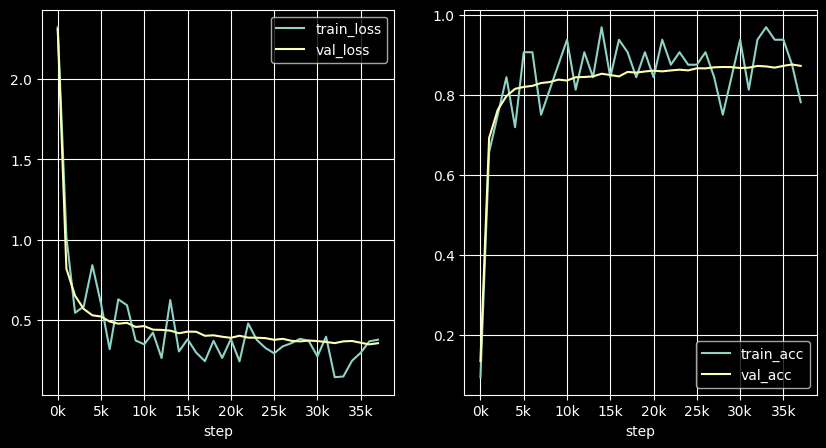

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 画线要注意的是损失是不一定在零到1之间的
def plot_learning_curves(record_dict, sample_step=1000):
    # --- 1. 构建 DataFrame ---
    # 将训练记录转换为DataFrame，设置'step'为索引，并进行采样（每sample_step取一个点）
    train_df = pd.DataFrame(record_dict["train"]).set_index("step").iloc[::sample_step]

    # 将验证记录转换为DataFrame，设置'step'为索引
    val_df = pd.DataFrame(record_dict["val"]).set_index("step")

    last_step = train_df.index[-1] # 获取最后一步的步数

    # 打印准确率数据查看（调试用）
    # print(train_df.columns)
    print(train_df['acc'])
    print(val_df['acc'])

    # --- 2. 绘图设置 ---
    fig_num = len(train_df.columns) # 根据列数决定画几张图（通常是loss和acc两张）
    fig, axs = plt.subplots(1, fig_num, figsize=(5 * fig_num, 5))

    # --- 3. 循环绘制每一列数据 ---
    for idx, item in enumerate(train_df.columns):
        # print(train_df[item].values)

        # 绘制训练集曲线
        axs[idx].plot(train_df.index, train_df[item], label=f"train_{item}")
        # 绘制验证集曲线
        axs[idx].plot(val_df.index, val_df[item], label=f"val_{item}")

        axs[idx].grid() # 显示网格
        axs[idx].legend() # 显示图例

        # --- 4. 设置坐标轴格式 ---
        # 设置x轴刻度：每5000步一个刻度
        axs[idx].set_xticks(range(0, train_df.index[-1], 5000))

        # 设置x轴标签：将数值转换为 "xk" 格式（如 5000 -> 5k）
        axs[idx].set_xticklabels(map(lambda x: f"{int(x/1000)}k", range(0, last_step, 5000)))

        axs[idx].set_xlabel("step")

    plt.show()

# 调用绘图函数
# record 是之前训练函数返回的字典
plot_learning_curves(record) # 横坐标是 steps

In [27]:
# dataload for evaluating

model.eval() # 进入评估模式
loss, acc = evaluating(model, val_loader, loss_fct)
print(f"loss:     {loss:.4f}\naccuracy: {acc:.4f}")

loss:     0.3681
accuracy: 0.8693


In [1]:
import os
import torch

class SaveCheckpointsCallback:
    def __init__(self, save_dir, save_step=500, save_best_only=True):
        """
        初始化保存模型的配置。

        Args:
            save_dir (str): 模型保存的文件夹路径。
            save_step (int, optional): 每隔多少步保存一次。默认为 500。
            save_best_only (bool, optional): 如果为 True，只覆盖保存最好的模型；否则保留每个保存点的文件。
        """
        self.save_dir = save_dir          # 保存路径
        self.save_step = save_step        # 保存步数
        self.save_best_only = save_best_only # 是否只保存最好的模型
        self.best_metrics = -1            # 最好的指标，初始化为-1 (假设指标是准确率，越高越好)

        # mkdir: 如果保存路径不存在，则自动创建
        if not os.path.exists(self.save_dir):
            os.mkdir(self.save_dir)

    def __call__(self, step, state_dict, metric=None):
        """
        在训练循环中被调用的函数。

        Args:
            step (int): 当前的全局训练步数 (global_step)。
            state_dict (dict): 模型的参数字典 (model.state_dict())。
            metric (float, optional): 当前的评估指标（如验证集准确率），用于判断是否是“最好”的模型。
        """
        # 1. 检查步数：如果当前步数不是保存步数的倍数，直接跳过
        if step % self.save_step != 0:
            return

        # 2. 保存逻辑
        if self.save_best_only:
            # 情况A: 只保存最好的模型
            # 必须提供 metric，且当前 metric 比之前的 best_metrics 更好才保存
            if metric is not None and metric > self.best_metrics:
                save_path = os.path.join(self.save_dir, "best.ckpt")

                # 保存模型参数
                torch.save(state_dict, save_path)

                # 更新最佳指标
                self.best_metrics = metric
                print(f"[Checkpoints] Step {step}: 发现新纪录! Metric={metric:.4f}, 模型已保存至 {save_path}")
        else:
            # 情况B: 保存所有检查点 (不覆盖)
            # 文件名带上 step 数，例如 "500.ckpt", "1000.ckpt"
            save_path = os.path.join(self.save_dir, f"{step}.ckpt")
            torch.save(state_dict, save_path)
            print(f"[Checkpoints] Step {step}: 模型已保存至 {save_path}")

连续五次都没有最低提升就早停

In [2]:
class EarlyStopCallback:
    def __init__(self, patience=5, min_delta=0.01):
        """
        初始化早停机制。

        Args:
            patience (int, optional): "耐心值"。如果连续多少次(epoch/step)指标没有提升，就停止训练。默认为5。
            min_delta (float, optional): "最小提升阈值"。只有当指标提升超过这个值，才算作有效提升。默认为0.01。
                                       (例如从 0.80 升到 0.805 不算提升，必须升到 0.81 以上才算)
        """
        self.patience = patience       # 耐心值
        self.min_delta = min_delta     # 最小提升幅度
        self.best_metric = -1          # 记录历史最好的指标 (假设指标越大越好，如准确率)
        self.counter = 0               # 计数器：记录连续多少次没有提升了

    def __call__(self, metric):
        """
        在训练循环中调用此函数，传入当前的评估指标。

        Args:
            metric (float): 当前的评估指标（如验证集准确率）。
        """
        # 判断当前指标是否比历史最好指标有"显著"提升
        # 即：当前分 >= (历史最高分 + 最小门槛)
        if metric >= self.best_metric + self.min_delta:
            # update best metric
            self.best_metric = metric  # 更新最高分
            # reset counter
            self.counter = 0           # 重置计数器，因为有进步了，重新开始给机会
        else:
            # 如果没进步（或者进步太小），计数器加 1
            self.counter += 1 # 计数器加1，下面的patience判断用到

    @property#这是一个装饰器，告诉解释器，这个函数返回一个值，但是这个值不是函数的返回值，而是属性的值。
    def early_stop(self):
        """
        判断是否应该停止训练。
        可以在训练循环中通过 `if callback.early_stop:` 来检查。
        """
        # 如果连续没进步的次数 >= 耐心值，就返回 True (该停了)
        return self.counter >= self.patience

In [9]:
def training(
    model,
    train_loader,
    val_loader,
    epoch,
    loss_fct,
    optimizer,
    tensorboard_callback=None, # TensorBoard回调
    save_ckpt_callback=None,   # 模型保存回调
    early_stop_callback=None,  # 早停回调
    eval_step=500,
):
    # 初始化记录字典
    record_dict = {
        "train": [],
        "val": []
    }

    global_step = 0
    model.train() # 开启训练模式

    # 开启进度条
    with tqdm(total=epoch * len(train_loader)) as pbar:
        for epoch_id in range(epoch):
            # --- Training Loop ---
            for datas, labels in train_loader:
                # 数据搬运到 GPU/CPU
                datas = datas.to(device)
                labels = labels.to(device)

                # 1. 梯度清空
                optimizer.zero_grad()

                # 2. 模型前向计算
                logits = model(datas)

                # 3. 计算损失
                loss = loss_fct(logits, labels)

                # 4. 梯度回传
                loss.backward()

                # 5. 更新参数
                optimizer.step()

                # --- 计算当前批次的指标 ---
                preds = logits.argmax(axis=-1)

                # 注意：accuracy_score 需要 cpu numpy 数组
                acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
                loss = loss.cpu().item()

                # 记录训练集信息
                record_dict["train"].append({
                    "loss": loss, "acc": acc, "step": global_step
                })

                # --- 定期评估 (Evaluating) ---
                if global_step % eval_step == 0:
                    model.eval() # 切换到验证模式

                    # 运行验证函数
                    val_loss, val_acc = evaluating(model, val_loader, loss_fct)

                    # 记录验证集信息
                    record_dict["val"].append({
                        "loss": val_loss, "acc": val_acc, "step": global_step
                    })

                    model.train() # 切回训练模式

                    # -------------------------------------------------------
                    # 1. 使用 TensorBoard 可视化
                    # -------------------------------------------------------
                    if tensorboard_callback is not None:
                        tensorboard_callback(
                            global_step,
                            loss=loss, val_loss=val_loss,
                            acc=acc, val_acc=val_acc,
                            lr=optimizer.param_groups[0]["lr"] # 取出当前学习率
                        )

                    # -------------------------------------------------------
                    # 2. 保存模型权重 (Checkpoints)
                    # -------------------------------------------------------
                    if save_ckpt_callback is not None:
                        # 传入 step, state_dict, 和用于判断好坏的 metric
                        save_ckpt_callback(global_step, model.state_dict(), metric=val_acc)

                    # -------------------------------------------------------
                    # 3. 早停机制 (Early Stop)
                    # -------------------------------------------------------
                    if early_stop_callback is not None:
                        early_stop_callback(val_acc) # 传入当前的验证准确率

                        if early_stop_callback.early_stop: # 检查是否触发了早停
                            print(f"Early stop at epoch {epoch_id} / global_step {global_step}")
                            return record_dict # 直接结束训练，返回记录

                # --- 更新步数 ---
                global_step += 1
                pbar.update(1)
                pbar.set_postfix({"epoch": epoch_id})

    return record_dict

In [10]:
model.state_dict()

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.0262,  0.0119, -0.0055,  ...,  0.0117,  0.0058, -0.0335],
                      [-0.0090,  0.0077,  0.0329,  ...,  0.0346,  0.0241,  0.0163],
                      [ 0.0186, -0.0306, -0.0098,  ..., -0.0223, -0.0268, -0.0308],
                      ...,
                      [-0.0084,  0.0057,  0.0042,  ..., -0.0220,  0.0318, -0.0200],
                      [-0.0279, -0.0029,  0.0068,  ...,  0.0007,  0.0268,  0.0207],
                      [-0.0159,  0.0035, -0.0319,  ..., -0.0334,  0.0275,  0.0299]],
                     device='cuda:0')),
             ('linear_relu_stack.0.bias',
              tensor([ 2.9399e-02, -4.6110e-03, -1.9769e-02, -1.0827e-02, -7.6820e-03,
                      -2.8120e-02,  6.1859e-03, -3.5116e-02,  1.6476e-02,  1.6545e-02,
                       7.0333e-05,  2.5635e-03, -1.1066e-02,  1.6321e-02, -1.5358e-02,
                       1.3735e-02, -1.0083e-02, -7.4808e-03, -3.3763e-02,  3.0369

In [11]:
model.state_dict().keys()

odict_keys(['linear_relu_stack.0.weight', 'linear_relu_stack.0.bias', 'linear_relu_stack.2.weight', 'linear_relu_stack.2.bias', 'linear_relu_stack.4.weight', 'linear_relu_stack.4.bias'])

In [30]:
from sklearn.metrics import accuracy_score
import torch

def evaluating(model, dataloader, loss_fct):
    """
    在验证集上评估模型性能
    """
    loss_list = []
    acc_list = []

    # 关键：验证时不需要计算梯度，加上这个可以省显存并加速
    with torch.no_grad():
        for datas, labels in dataloader:
            datas = datas.to(device)
            labels = labels.to(device)

            # 1. 前向计算
            logits = model(datas)

            # 2. 计算损失
            loss = loss_fct(logits, labels)

            # 3. 计算准确率
            preds = logits.argmax(axis=-1)
            acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())

            # 记录这一批次的结果
            loss_list.append(loss.item())
            acc_list.append(acc)

    # 返回平均损失和平均准确率
    return sum(loss_list) / len(loss_list), sum(acc_list) / len(acc_list)

In [ ]:
# 必须要有 record = ... 这一步
record = training(
    model,
    train_loader,
    val_loader,
    epoch,
    loss_fct,
    optimizer,
    save_ckpt_callback=save_ckpt_callback,
    early_stop_callback=early_stop_callback,
    eval_step=1000
)

  6%|▌         | 10997/187500 [03:09<58:24, 50.36it/s, epoch=5]  

In [28]:

import matplotlib.pyplot as plt

def plot_learning_curves(record_dict, sample_step=500):
    # build DataFrame (构建数据表)
    # 训练集数据通常很多，使用 iloc[::sample_step] 进行采样，避免图表太密集
    train_df = pd.DataFrame(record_dict["train"]).set_index("step").iloc[::sample_step]
    val_df = pd.DataFrame(record_dict["val"]).set_index("step")

    # 打印前几行看看数据格式对不对
    print("Train Head:", train_df.head())
    print("Val Head:", val_df.head())

    # plot (开始绘图)
    fig_num = len(train_df.columns) # 因为有 loss 和 acc 两个指标，所以会有2个子图
    fig, axs = plt.subplots(1, fig_num, figsize=(5 * fig_num, 5)) # 动态设置画布大小

    for idx, item in enumerate(train_df.columns):
        # 绘制训练集曲线
        axs[idx].plot(train_df.index, train_df[item], label=f"train_{item}")
        # 绘制验证集曲线
        axs[idx].plot(val_df.index, val_df[item], label=f"val_{item}")

        axs[idx].grid() # 显示网格
        axs[idx].legend() # 显示图例

        # 设置横坐标刻度 (每隔 5000 步标一个点)
        # 注意：如果你的总步数少于 5000，这里可能会报错或不显示刻度，可以根据实际情况调整这个 5000
        if len(train_df) > 0:
            max_step = train_df.index[-1]
            # 只有当步数足够大时才自定义刻度，防止报错
            if max_step > 5000:
                x_data = range(0, max_step, 5000)
                axs[idx].set_xticks(x_data)
                axs[idx].set_xticklabels(map(lambda x: f"{int(x/1000)}k", x_data)) # 把 5000 变成 5k

        axs[idx].set_xlabel("step")

    plt.show()

# 调用函数开始画图
# sample_step=500 表示训练集每500步取一个点画图，这样曲线更平滑
plot_learning_curves(record, sample_step=500)

NameError: name 'record' is not defined

In [ ]:
import torch

# 1. 重新实例化一个“空”模型
# 这就像买了一台新手机，里面还没装数据
model = NeuralNetwork()

# 2. 加载“最佳权重”
# map_location="cpu" 的作用是：无论你是在 GPU 还是 CPU 上训练的，
# 加载时都先映射到当前定义的 device 上（防止在只有 CPU 的机器上加载 GPU 模型报错）
ckpt_path = "checkpoints/best.ckpt"

try:
    print(f"正在加载模型权重: {ckpt_path} ...")
    # 加载权重字典
    ckpt = torch.load(ckpt_path, map_location=device)
    # 将权重填入模型
    model.load_state_dict(ckpt)
    print("✅ 模型权重加载成功！")
except FileNotFoundError:
    print(f"❌ 错误：找不到文件 {ckpt_path}。请先运行训练代码生成模型文件。")

# 3. 将模型搬运到计算设备 (GPU/CPU)
model = model.to(device)

# 4. 开启评估模式
# 关键步骤！这会关闭 Dropout，锁定 BatchNorm，确保预测结果稳定
model.eval()

# 5. 开始最终测试
# 注意：这里需要你之前定义好的 evaluating 函数、val_loader 和 loss_fct
print("正在进行最终评估...")
loss, acc = evaluating(model, val_loader, loss_fct)

# 6. 打印最终成绩单
print("-" * 30)
print(f"🏆 最终验证集评估结果:")
print(f"Loss:     {loss:.4f}")
print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print("-" * 30)